In [ ]:
!pip install requests pandas matplotlib seaborn

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
class WeatherAnalyzer:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = "https://api.openweathermap.org/data/2.5/weather"
        self.data_file = "weather_data.csv"

    def get_weather_data(self, cities):
        weather_data=[]
        for city in cities:
          try:
            params = {
                'q' : city,
                'appid' : self.api_key,
                'units' : 'metric'
            }
            response = requests.get(self.base_url, params=params)
            print(f"Status code for {city}: {response.status_code}")

            if response.status_code == 200:
                data = response.json()
                weather_info = self.parse_weather_data(data, city)
                weather_data.append(weather_info)
            else:
              print(f"Error fetching data for {city}: {response.text}")
          except Exception as e:
            print(f"Error processing {city} : {e}")
        return weather_data

    def parse_weather_data(self, data, city):
      try:
        return{
            'city' : city,
            'datetime' : datetime.fromtimestamp(data['dt']).strftime('%Y-%m-%d %H:%M:%S'),
            'temperature' : round(data['main']['temp'], 2),
            'feels_like' : round(data['main']['feels_like'], 2),
            'humidity' : data['main']['humidity'],
            'wind_speed' : round(data['wind']['speed'], 2),
            'weather_description' : data['weather'][0]['description'],
            'pressure' : data['main']['pressure']

        }
      except Exception as e:
        print(f"Error parsing data for {city}: {e}")
        return None
    def save_weather_data(self, data):
      if not data:
        print("No data to save")
        return
      try:
        df = pd.DataFrame(data)
        df.to_csv(self.data_file, index=False)
        print(f"Data saved to {self.data_file}")
        print("\nSaved data preview: ")
        print(df)
        return df
      except Exception as e:
        print(f"Error saving data: {e}")
        return None

    def create_weather_dashboard(self, df):
      if df is None or df.empty:
        print("No data to create dashboard")
        return
      sns.set_theme
      fig = plt.figure(figsize=(15, 10))
      plt.subplot(2, 2, 1)
      bars = plt.bar(df['city'], df['temperature'])
      plt.title('Temperature by City')
      plt.xlabel('City')
      plt.ylabel('Temperature')
      plt.xticks(rotation=45)
      for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}°C', ha='center', va='bottom')

      #humidity
      plt.subplot(2, 2, 2)
      bars = plt.bar(df['city'], df['humidity'])
      plt.title('Humidity by City')
      plt.xlabel('City')
      plt.ylabel('Humidity')
      plt.xticks(rotation=45)
      for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}%', ha='center', va='bottom')
      #pressure
      plt.subplot(2, 2, 4)
      bars = plt.bar(df['city'], df['pressure'])
      plt.title('Pressure by City')
      plt.xlabel('City')
      plt.ylabel('Pressure')
      plt.xticks(rotation=45)
      for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height} hPa', ha='center', va='bottom')

      plt.tight_layout()
      plt.show()

Fetching weather data...
Status code for London, UK: 200
Status code for New York, US: 200
Status code for Paris, FR: 200
Status code for Tokyo, JP: 200
Status code for Sydney, AU: 200
Status code for Dubai, AE: 200
Status code for Singapore, SG: 200
Status code for Mumbai, IN: 200
Status code for Los Angeles, US: 200
Status code for Berlin, DE: 200
Data saved to weather_data.csv

Saved data preview: 
              city             datetime  temperature  feels_like  humidity  \
0       London, UK  2024-12-17 13:43:50         9.90        7.82        88   
1     New York, US  2024-12-17 13:41:12        10.79       10.30        91   
2        Paris, FR  2024-12-17 13:41:05         6.91        3.89        95   
3        Tokyo, JP  2024-12-17 13:41:06         9.41        7.00        63   
4       Sydney, AU  2024-12-17 13:43:18        20.11       20.16        76   
5        Dubai, AE  2024-12-17 13:41:05        22.96       22.30        38   
6    Singapore, SG  2024-12-17 13:44:30        26

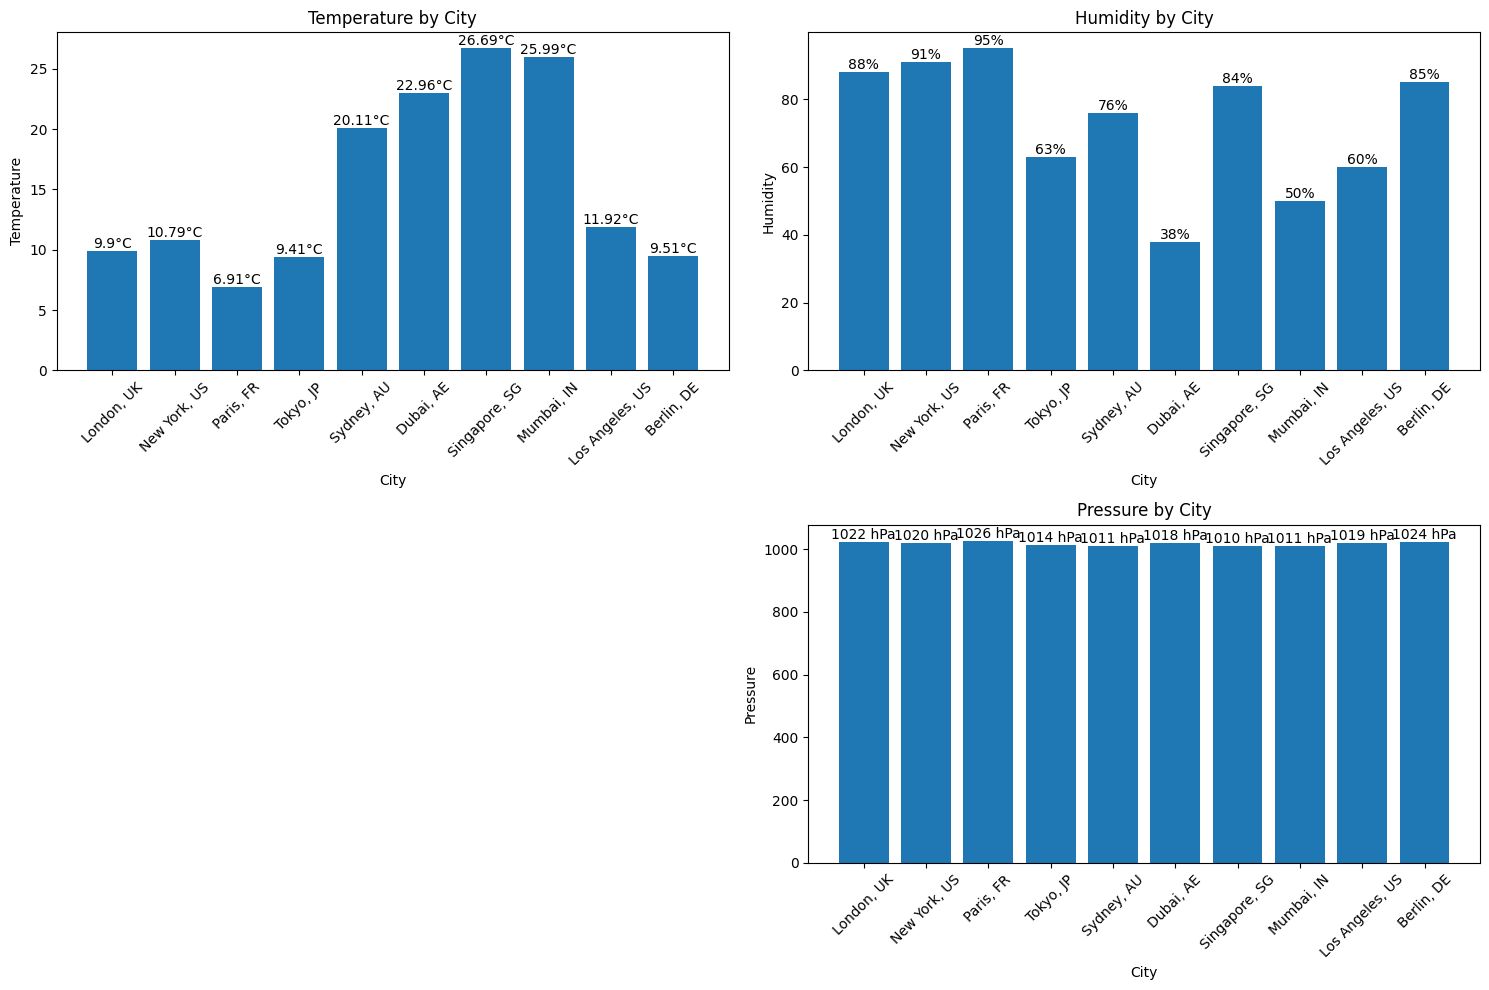


 Statistical Summary: 
       temperature  feels_like   humidity  wind_speed     pressure
count    10.000000   10.000000  10.000000   10.000000    10.000000
mean     15.419000   14.342000  73.000000    4.786000  1017.500000
std       7.639161    9.226654  19.235384    2.859383     5.739725
min       6.910000    3.890000  38.000000    2.060000  1010.000000
25%       9.607500    7.205000  60.750000    2.317500  1011.750000
50%      11.355000   10.515000  80.000000    4.375000  1018.500000
75%      22.247500   21.765000  87.250000    5.785000  1021.500000
max      26.690000   29.380000  95.000000   10.290000  1026.000000


In [ ]:
def main():
  API_KEY = "14f12ed1cef60ae627157bb2c403f3fa"
  cities = [
      "London, UK",
      "New York, US",
      "Paris, FR",
      "Tokyo, JP",
      "Sydney, AU",
      "Dubai, AE",
      "Singapore, SG",
      "Mumbai, IN",
      "Los Angeles, US",
      "Berlin, DE"
  ]

  analyzer = WeatherAnalyzer(API_KEY)

  print("Fetching weather data...")
  weather_data = analyzer.get_weather_data(cities)

  if weather_data:
    df = analyzer.save_weather_data(weather_data)
    if df is not None:
      print("Creating weather dashboard...")
      analyzer.create_weather_dashboard(df)
      print("\n Statistical Summary: ")
      print(df.describe())
    else:
      print("No data to create dashboard")

if __name__ == "__main__":
  main()
